In [2]:
import requests
import json
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from config import api_key
from scipy.stats import linregress

pd.options.display.float_format = "{:,.2f}".format

allmovies_df = pd.read_csv("allmoviesdata.csv")
allmovies_df["Director"] = allmovies_df["Director"].astype('string')

PDW_df = allmovies_df[["Production Budget","Domestic Gross","Worldwide Gross"]]
Prod_Domestic_df = PDW_df[['Production Budget','Domestic Gross']].copy()
Prod_World_df = PDW_df[['Production Budget','Worldwide Gross']].copy()
production_bud_df = PDW_df[(PDW_df["Production Budget"]>=0)]
domestic_gross_df = PDW_df[(PDW_df["Domestic Gross"]>=0)]
worldwide_gross_df = PDW_df[(PDW_df["Worldwide Gross"]>=0)]

PDW_df

,Production Budget,Domestic Gross,Worldwide Gross
0,"200,000,000.00","700,059,566.00","1,336,494,320.00"
1,"300,000,000.00","678,815,482.00","2,048,359,754.00"
2,"200,000,000.00","608,581,744.00","1,242,805,359.00"
3,"170,000,000.00","417,719,760.00","1,308,323,302.00"
4,"275,000,000.00","213,767,512.00","393,151,347.00"
...,...,...,...
216,"4,000,000.00","38,251,425.00","38,251,425.00"
217,"25,000,000.00","54,607,383.00","119,295,584.00"
218,"207,000,000.00","218,080,025.00","550,517,357.00"
219,"100,000,000.00","56,846,802.00","126,815,030.00"


# Linear Regression for Production Budget vs Domestic Gross

R squared: 0.3232711691240383


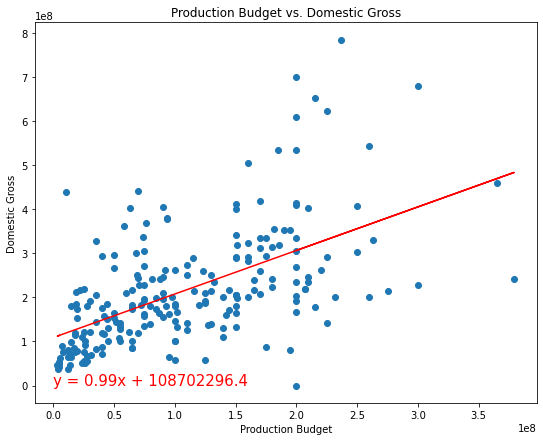

In [7]:
# Linear regression on Production Budget vs Domestic Gross
x_values = production_bud_df['Production Budget']
y_values = domestic_gross_df['Domestic Gross']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.title('Production Budget vs. Domestic Gross')

print(f"R squared: {rvalue**2}")

plt.show()



# Analysis
Linear regression on scatter plot showing an r squared value of 0.32.

# Linear Regression for Production Budget vs Worldwide Gross

R squared: 0.4228452241700751


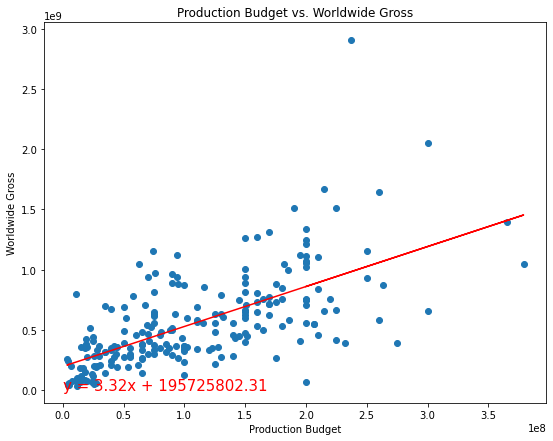

In [4]:
# Linear regression on Production Budget vs Worldwide Gross
x_values = production_bud_df['Production Budget']
y_values = worldwide_gross_df['Worldwide Gross']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs. Worldwide Gross')

print(f"R squared: {rvalue**2}")

plt.show()



# Analysis
Linear regression on scatter plot showing an r squared value of 0.42.

# Final Analysis
Does production budget affect domestic gross and/or worldwide gross?

At first glance I was of the opinion that the higher the movie budget the more money it was going to make domestically/worldwide. However the domestic r-squared value is .32, the worldwide r-squared value is slightly higher at .42 and the points on the scatter plot have a greater dispersion the higher the budget gets. I would say that a higher movie budget does not fit our assumption that the greater the budget the greater the profits.